In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving April18_to_September20.csv to April18_to_September20.csv


In [ ]:
import pandas as pd 
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['April18_to_September20.csv'])) 
print(df)

            Date                Country  Population  Total Tests  Total Cases  \
0      4/18/2020                    USA   331441624    3722145.0     738792.0   
1      4/18/2020                  India  1383048851     335123.0      16365.0   
2      4/18/2020                 Brazil   212900304      62985.0      36722.0   
3      4/18/2020                 Russia   145948762    1831892.0      36793.0   
4      4/18/2020                   Peru    33074060     135895.0      14420.0   
...          ...                    ...         ...          ...          ...   
33223  9/20/2020       Falkland Islands        3502       2261.0         13.0   
33224  9/20/2020           Vatican City         801          NaN         12.0   
33225  9/20/2020  Saint Pierre Miquelon        5787       1051.0         11.0   
33226  9/20/2020         Western Sahara      600533          NaN         10.0   
33227  9/20/2020               Anguilla       15033       1020.0          3.0   

       Total Deaths  Total 

In [ ]:
for colum in df:
  print(colum , df[colum].isnull().values.any())

Date False
Country False
Population False
Total Tests True
Total Cases True
Total Deaths True
Total Recovered True
Serious or Critical True
Active Cases True


In [ ]:
from sklearn.impute import SimpleImputer
for colum in df:
  if df[colum].isnull().values.any() == True:
    si = SimpleImputer(strategy='mean')
    si.fit(df[[colum]])
    df[colum] = si.transform(df[[colum]]).flatten()

In [ ]:
for colum in df:
  print(colum , df[colum].isnull().values.any())

Date False
Country False
Population False
Total Tests False
Total Cases False
Total Deaths False
Total Recovered False
Serious or Critical False
Active Cases False


In [ ]:
pd.set_option("display.max.columns", None)

In [ ]:
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,4/18/2020,USA,331441624,3722145.0,738792.0,39014.0,68269.0,13551.000000,631509.0
1,4/18/2020,India,1383048851,335123.0,16365.0,521.0,2463.0,449.143356,13381.0
2,4/18/2020,Brazil,212900304,62985.0,36722.0,2361.0,14026.0,6634.000000,20335.0
3,4/18/2020,Russia,145948762,1831892.0,36793.0,313.0,3057.0,8.000000,33423.0
4,4/18/2020,Peru,33074060,135895.0,14420.0,348.0,6684.0,117.000000,7388.0


In [ ]:
df.tail()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
33223,9/20/2020,Falkland Islands,3502,2.261000e+03,13.0,3013.837104,13.0,449.143356,0.0
33224,9/20/2020,Vatican City,801,1.292014e+06,12.0,3013.837104,12.0,449.143356,0.0
33225,9/20/2020,Saint Pierre Miquelon,5787,1.051000e+03,11.0,3013.837104,5.0,449.143356,6.0
33226,9/20/2020,Western Sahara,600533,1.292014e+06,10.0,1.000000,8.0,449.143356,1.0
33227,9/20/2020,Anguilla,15033,1.020000e+03,3.0,3013.837104,3.0,449.143356,0.0


In [ ]:
#df['Population'].mean()
df['Total Tests'].mean()
#df['Total Cases'].mean()
#df['Total Deaths'].mean()
#df['Total Recovered'].mean()
#df['Serious or Critical'].mean()
#df['Active Cases'].mean()


1292014.0463381829

In [ ]:
df['Total Tests'].median()

127101.0

In [ ]:
df.describe()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
count,3.322800e+04,3.322800e+04,3.322800e+04,33228.000000,3.322800e+04,33228.000000,3.322800e+04
mean,3.650339e+07,1.292014e+06,6.373149e+04,3013.837104,3.986458e+04,449.143356,1.981569e+04
std,1.413998e+08,7.112529e+06,3.576499e+05,12403.682551,2.270028e+05,1410.322895,1.338150e+05
min,8.010000e+02,1.000000e+01,1.000000e+00,0.000000,1.000000e+00,1.000000,-6.840000e+02
25%,8.736590e+05,1.300000e+04,2.717500e+02,18.000000,1.320000e+02,9.000000,4.200000e+01
50%,6.892098e+06,1.271010e+05,2.133000e+03,125.000000,1.209000e+03,251.000000,5.700000e+02
75%,2.556604e+07,9.500552e+05,1.861800e+04,2939.000000,1.176225e+04,449.143356,5.174000e+03
max,1.439324e+09,1.600000e+08,7.009844e+06,204118.000000,4.392650e+06,19179.000000,2.571758e+06


In [ ]:
df['Total Tests']

0        3722145.0
1         335123.0
2          62985.0
3        1831892.0
4         135895.0
           ...    
33223       2261.0
33224          NaN
33225       1051.0
33226          NaN
33227       1020.0
Name: Total Tests, Length: 33228, dtype: float64

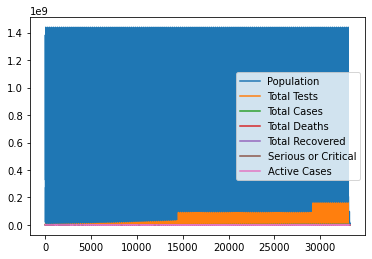

In [ ]:
df.plot()

In [ ]:
df = pd.DataFrame(df)
print(df.shape)

(33228, 9)


In [ ]:
import plotly.express as px
fig = px.line(df, x = 'Total Tests', y = 'Total Cases', title='Total Tests Vs Total Cases')
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(df, x = 'Country', y = 'Total Cases', title='Country Vs Total Cases')
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(df, x = 'Country', y = 'Total Deaths', title='Country Vs Total Deaths')
fig.show()

In [ ]:
import plotly.express as px
fig = px.line(df, x = 'Country', y = 'Total Recovered', title='Country Vs Total Recovered')
fig.show()

In [ ]:
total_test = df['Total Tests'].tolist()
country = df['Country'].tolist()

total_cases = df['Total Cases'].tolist()
population = df['Population'].tolist()

total_deaths = df['Total Deaths'].tolist()
total_recovered = df['Total Recovered'].tolist()

serious_or_critical = df['Serious or Critical'].tolist()
active_cases = df['Active Cases'].tolist()
date = df['Date'].tolist()



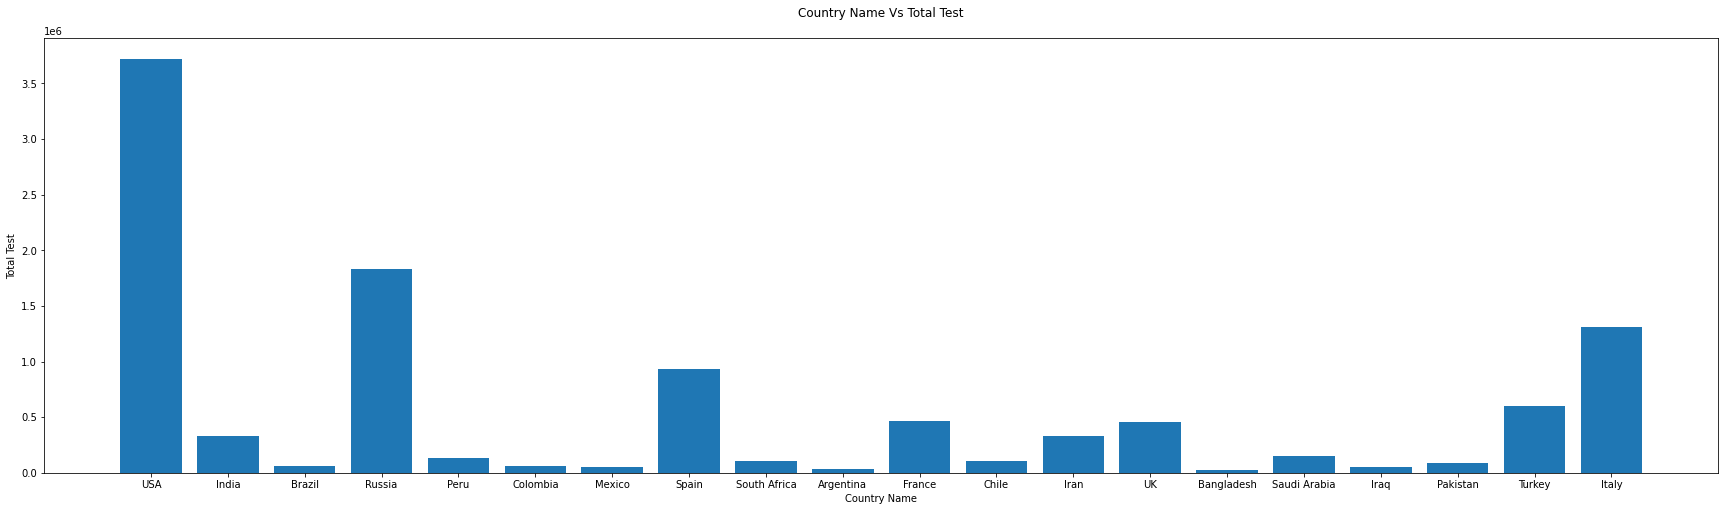

In [ ]:
from matplotlib import pyplot as plt 
  

  
name = df['Country'].head(20) 
t_test = df['Total Tests'].head(20) 
  
# Figure Size 
fig = plt.figure(figsize =(30, 8)) 
  
# Horizontal Bar Plot 
plt.bar(name[0:20], t_test[0:20]) 
plt.xlabel('Country Name')
plt.ylabel('Total Test')
plt.title('Country Name Vs Total Test\n')
# Show Plot 
plt.show() 

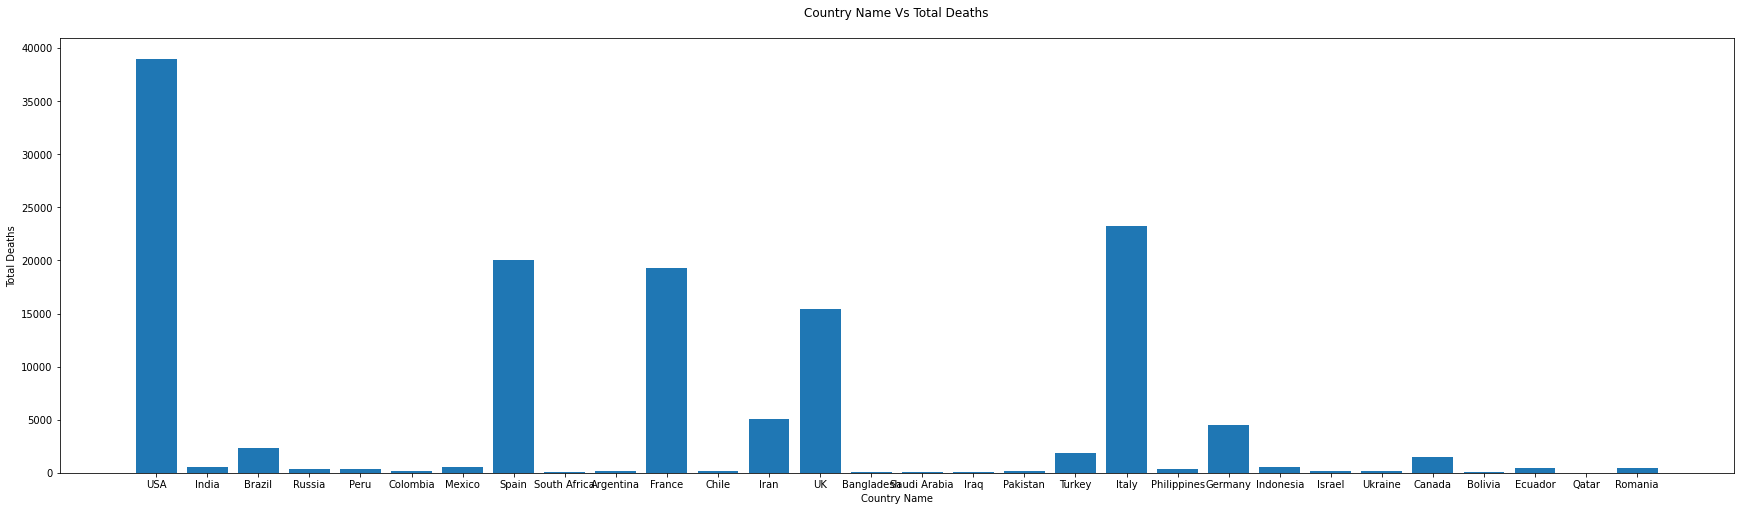

In [ ]:
from matplotlib import pyplot as plt 
  

  
name = df['Country']
t_deaths = df['Total Deaths'] 
  
# Figure Size 
fig = plt.figure(figsize =(30, 8)) 
  
# Horizontal Bar Plot 
plt.bar(name[0:30], t_deaths[0:30]) 
plt.xlabel('Country Name')
plt.ylabel('Total Deaths')
plt.title('Country Name Vs Total Deaths\n')
# Show Plot 
plt.show() 

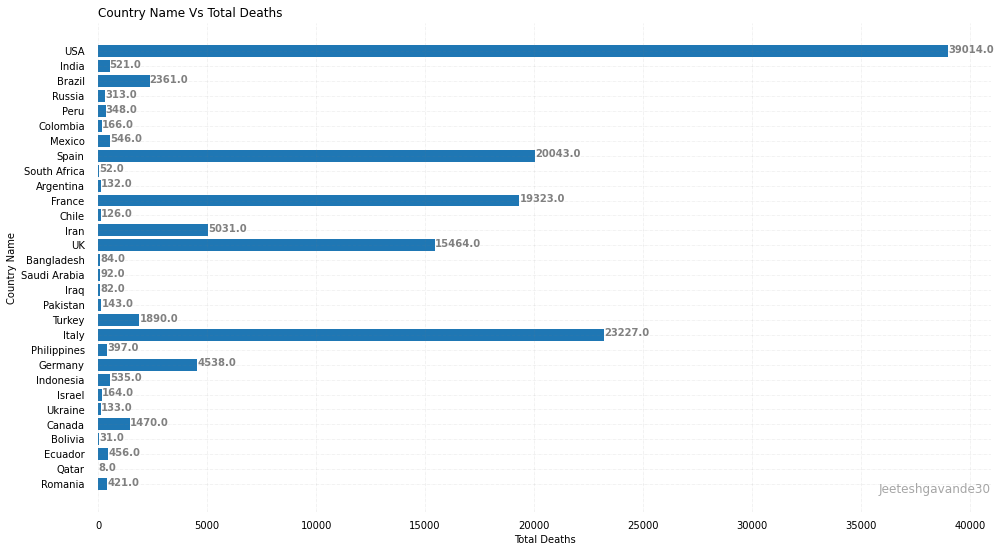

In [ ]:
#import pandas as pd 
from matplotlib import pyplot as plt 


name = df['Country'].head(30) 
t_deaths = df['Total Deaths'].head(30) 
  
# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(name, t_deaths) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('Country Name Vs Total Deaths', 
             loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
plt.xlabel('Total Deaths') 
plt.ylabel('Country Name')
#plt.title('Country Name Vs Total Deaths\n')
# Show Plot 
plt.show() 

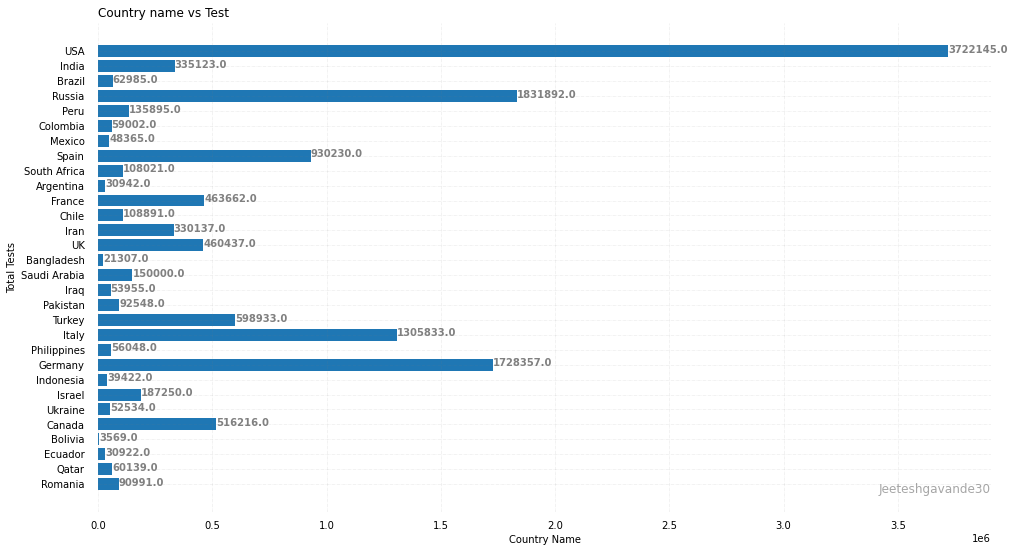

In [ ]:
#import pandas as pd 
from matplotlib import pyplot as plt 


name = df['Country'].head(30) 
price = df['Total Tests'].head(30) 

# Figure Size 
fig, ax = plt.subplots(figsize =(16, 9)) 
  
# Horizontal Bar Plot 
ax.barh(name, price) 
  
# Remove axes splines 
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False) 
  
# Remove x, y Ticks 
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none') 
  
# Add padding between axes and labels 
ax.xaxis.set_tick_params(pad = 5) 
ax.yaxis.set_tick_params(pad = 10) 
  
# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2) 
  
# Show top values  
ax.invert_yaxis() 
  
# Add annotation to bars 
for i in ax.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='grey') 
  
# Add Plot Title 
ax.set_title('Country name vs Test', 
             loc ='left', ) 
  
# Add Text watermark 
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, 
         color ='grey', ha ='right', va ='bottom', 
         alpha = 0.7) 
plt.xlabel('Country Name') 
plt.ylabel('Total Tests')  
# Show Plot 
plt.show() 

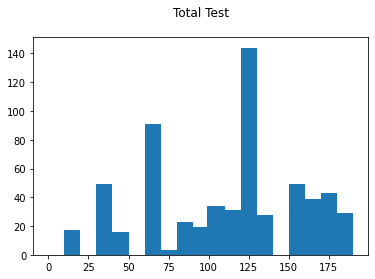

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Total Tests'], bins=[0,10,20,30,40,50,60,70,80,90,99,110,120,130,140,150,160,170,180,190])
plt.title('Total Test\n')
plt.show()

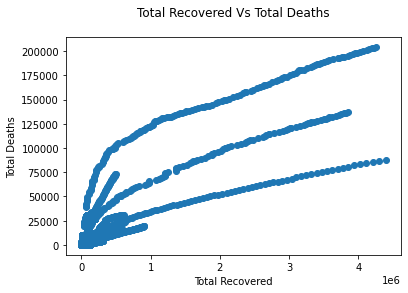

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Total Recovered'], df['Total Deaths'])

plt.xlabel('Total Recovered')
plt.ylabel('Total Deaths')
plt.title('Total Recovered Vs Total Deaths\n')

plt.show()

Text(0.5, 1.0, 'Total Cases Vs Total Deaths\n')

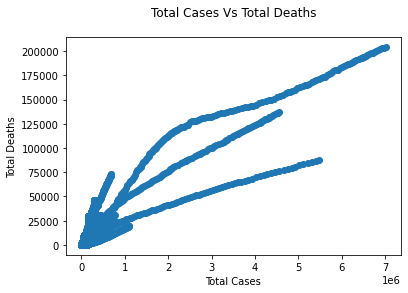

In [ ]:
plt.scatter(df['Total Cases'], df['Total Deaths'])
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.title('Total Cases Vs Total Deaths\n')


Text(0.5, 1.0, 'Total Tests Vs Total Cases\n')

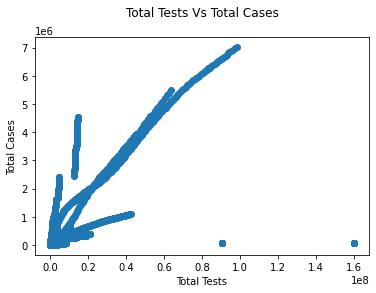

In [ ]:
plt.scatter(df['Total Tests'], df['Total Cases'])
plt.xlabel('Total Tests')
plt.ylabel('Total Cases')
plt.title('Total Tests Vs Total Cases\n')

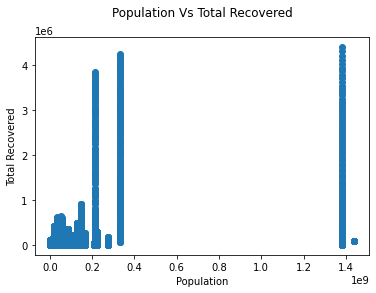

In [ ]:
x = df['Population']
y = df['Total Recovered']
plt.scatter(x, y)

plt.xlabel('Population')
plt.ylabel('Total Recovered')
plt.title('Population Vs Total Recovered\n')

plt.show()


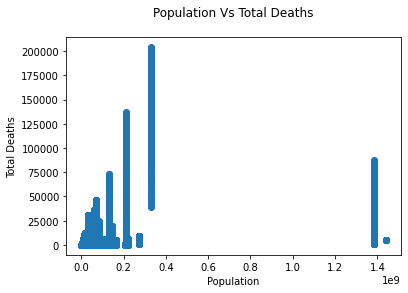

In [ ]:
x = df['Population']
y = df['Total Deaths']
plt.scatter(x, y)

plt.xlabel('Population')
plt.ylabel('Total Deaths')
plt.title('Population Vs Total Deaths\n')

plt.show()


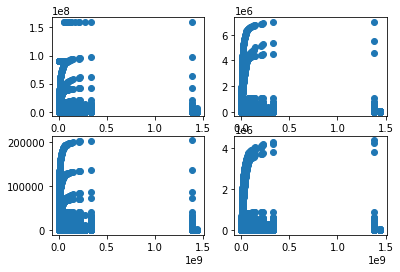

In [ ]:

x = df['Population']
y = df['Total Tests']
plt.subplot(2, 2, 1)
plt.scatter(x, y)
x = df['Population']
y = df['Total Cases']
plt.subplot(2, 2, 2)
plt.scatter(x, y)
############
x = df['Population']
y = df['Total Deaths']
plt.subplot(2, 2, 3)
plt.scatter(x, y)
x = df['Population']
y = df['Total Recovered']
plt.subplot(2, 2, 4)
plt.scatter(x, y)
plt.show()

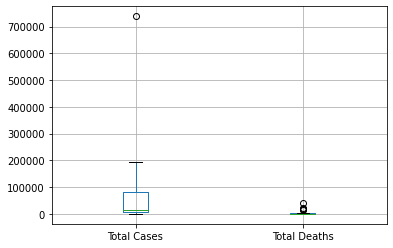

In [ ]:
import numpy as np
import pandas as pd

#np.random.seed(2345)
#df = pd.DataFrame(np.random.randn(20,4),
#                 columns=['C1', 'C2', 'C3', 'C4'])
boxplot = df.head(25).boxplot(column=['Total Cases', 'Total Deaths'])
#df.columns

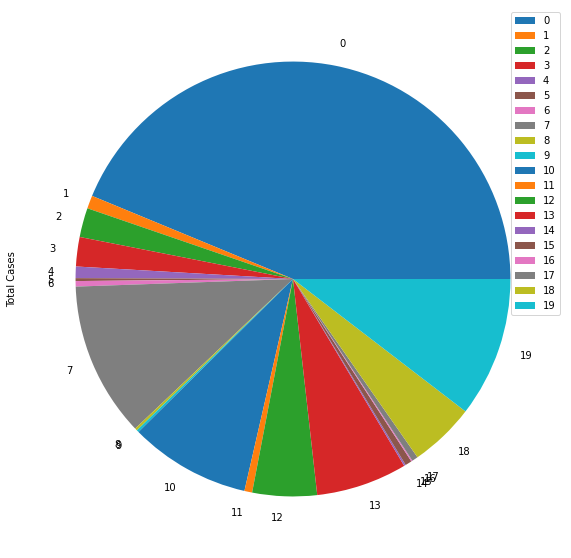

In [ ]:
df.head(20).plot.pie(y='Total Cases', figsize=(10, 10))

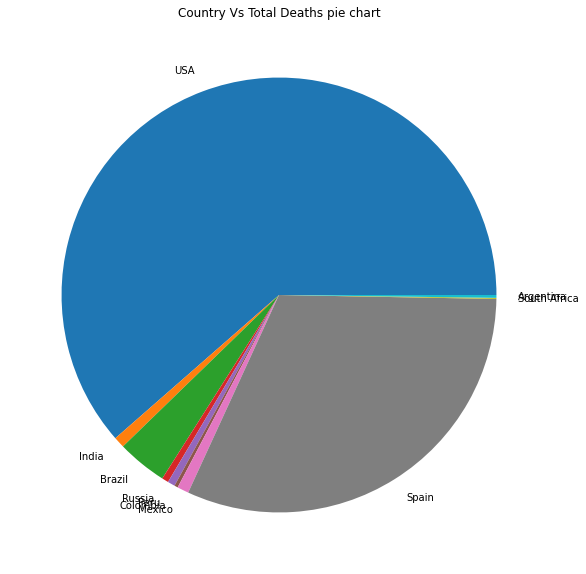

In [ ]:
# Creating plot 
fig = plt.figure(figsize =(10, 10)) 
plt.pie(df['Total Deaths'].head(10), labels = df['Country'].head(10)) 
  
# show plot
plt.title('Country Vs Total Deaths pie chart')

#plt.set_title("Country Vs Total Deaths pie chart") 
plt.show() 

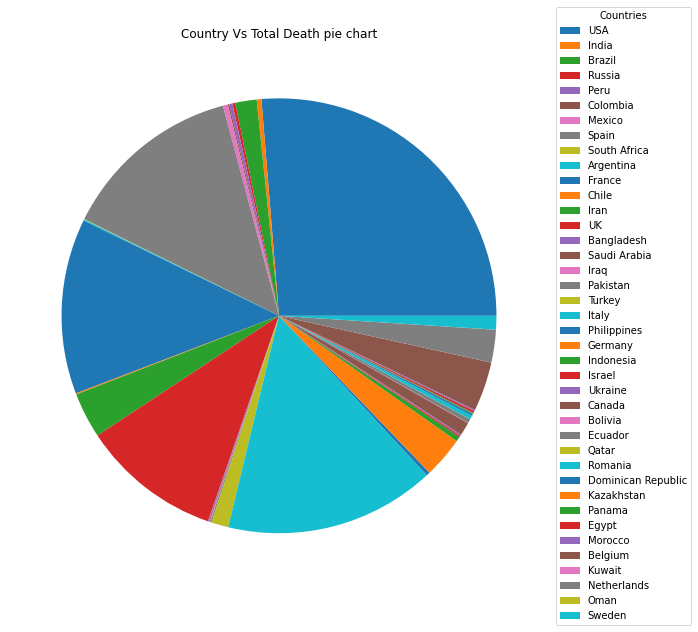

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

country = df['Country'].head(40)

data = df['Total Deaths'].head(40)

wedges, autotexts = ax.pie(data,textprops=dict(color="w"))

ax.legend(wedges, country,
          title="Countries",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Country Vs Total Death pie chart")

plt.show()


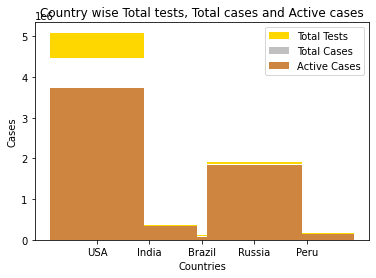

In [ ]:
countries = df['Country'].head(5)
tt = df['Total Tests'].head(5)
tc = df['Total Cases'].head(5)
ac = df['Active Cases'].head(5)
ind = [x for x, _ in enumerate(countries)]

plt.bar(ind, ac, width=1.8, label='Total Tests', color='gold', bottom=tt+tc)
plt.bar(ind, tc, width=1.8, label='Total Cases', color='silver', bottom=tc)
plt.bar(ind, tt, width=1.8, label='Active Cases', color='#CD853F')

plt.xticks(ind, countries)
plt.ylabel("Cases")
plt.xlabel("Countries")
plt.legend(loc="upper right")
plt.title("Country wise Total tests, Total cases and Active cases")

plt.show()

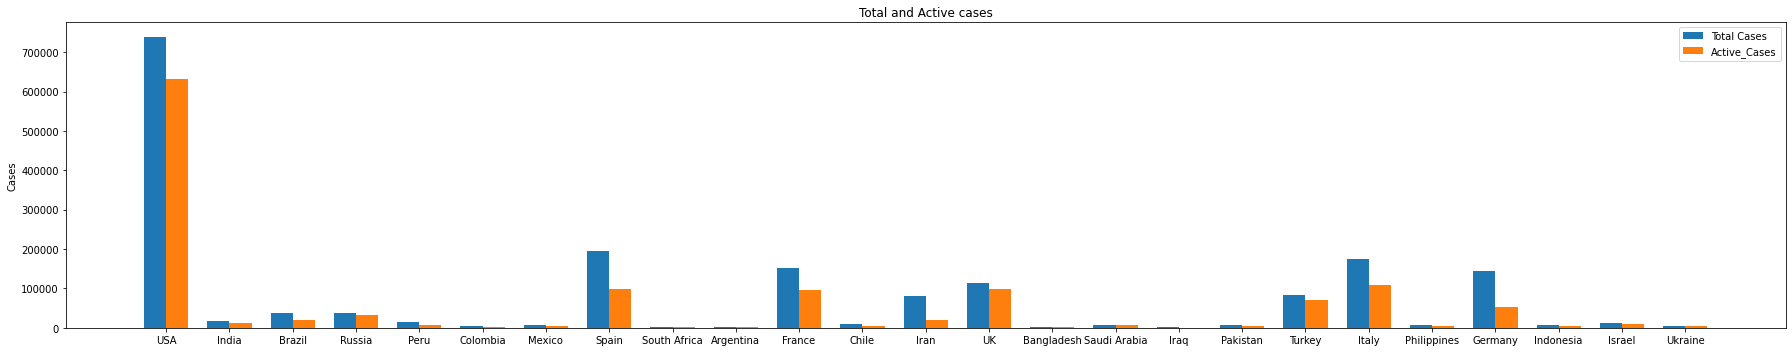

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = df['Country'].head(25)
t_cases = df['Total Cases'].head(25)
at_cases = df['Active Cases'].head(25)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(25,5))
rects1 = ax.bar(x - width/2, t_cases, width, label='Total Cases')
rects2 = ax.bar(x + width/2, at_cases, width, label='Active_Cases')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases')
ax.set_title('Total and Active cases')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


#autolabel(rects1)
#autolabel(rects2)
#plt.fig(figsize=(502,502))
fig.tight_layout()

plt.show()

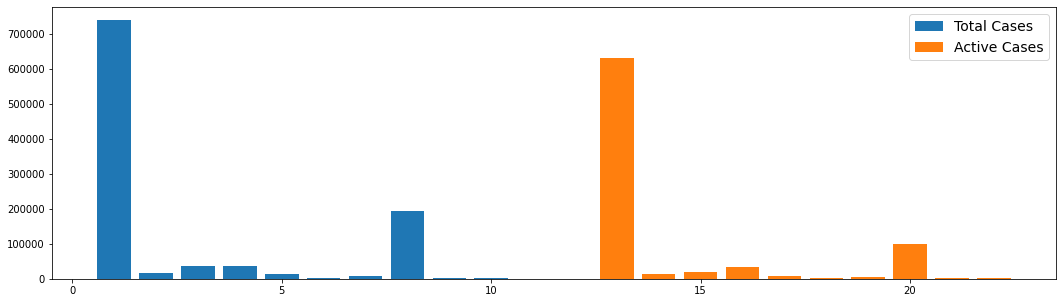

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(18,5)) # set the size that you'd like (width, height)
plt.bar([1,2,3,4,5,6,7,8,9,10], df['Total Cases'].head(10), label = 'Total Cases')
plt.bar([13,14,15,16,17,18,19,20,21,22], df['Active Cases'].head(10), label = 'Active Cases')
ax.legend(fontsize = 14)

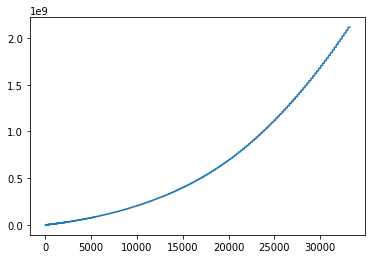

In [ ]:
#ts = pd.Series(df['Total Cases'], index=df['Date'], periods=1000))
ts = df['Total Cases']
ts = ts.cumsum()
ts.plot()

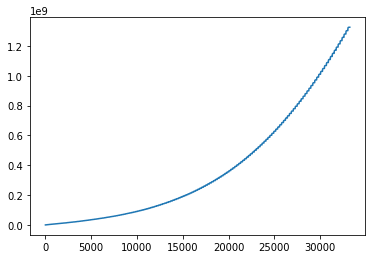

In [ ]:
ts = df['Total Recovered']
ts = ts.cumsum()
ts.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.7/dist-pack

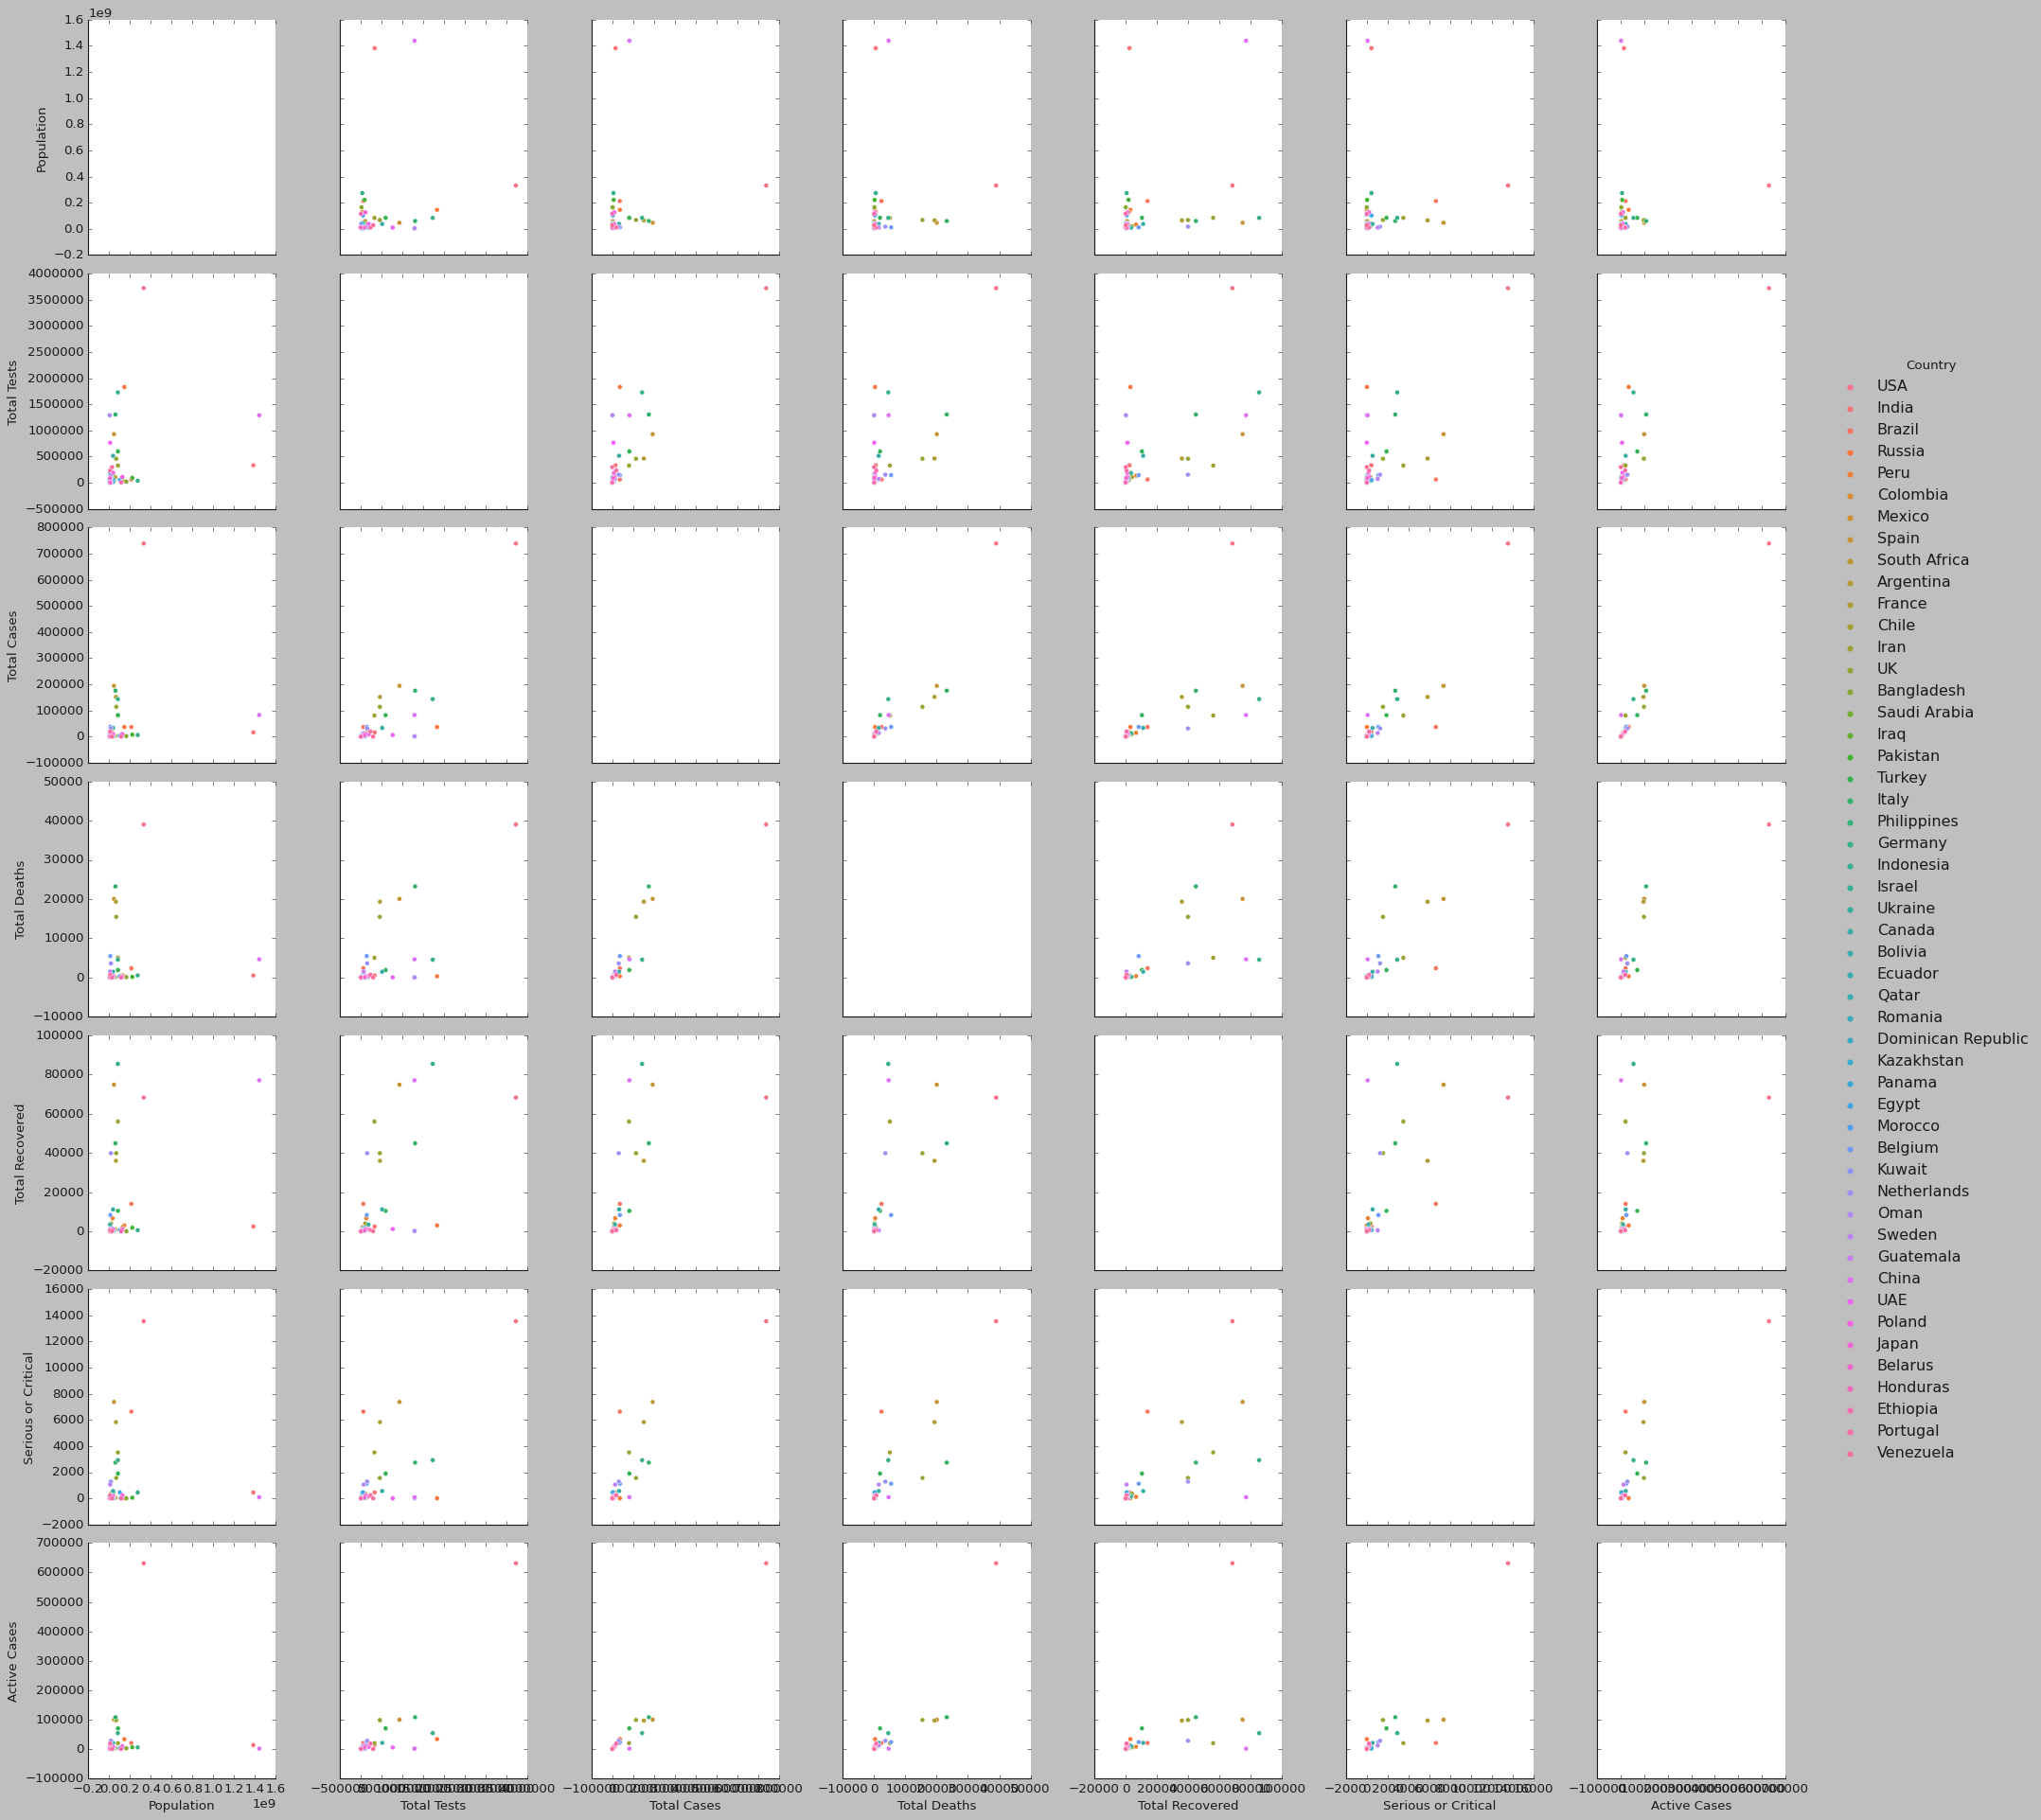

In [ ]:
import seaborn as sns
sns.set()
plt.style.use('classic')
sns.pairplot(df.head(50), hue='Country', size=3.5);

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



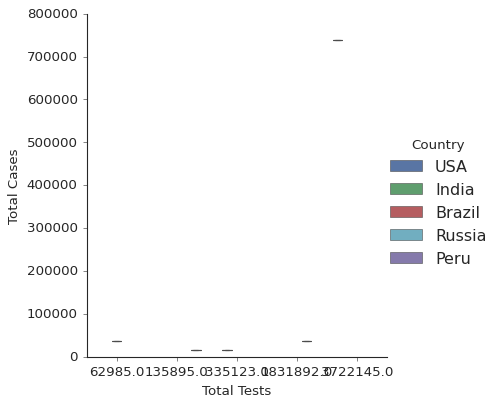

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("Total Tests", "Total Cases", "Country", data=df.head(5), kind="box")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



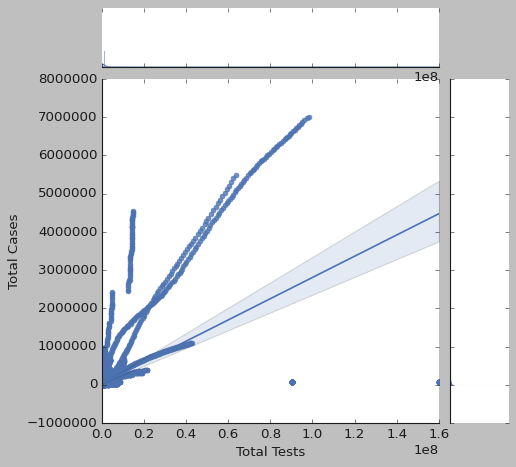

In [ ]:
sns.jointplot("Total Tests", "Total Cases", data=df, kind='reg');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



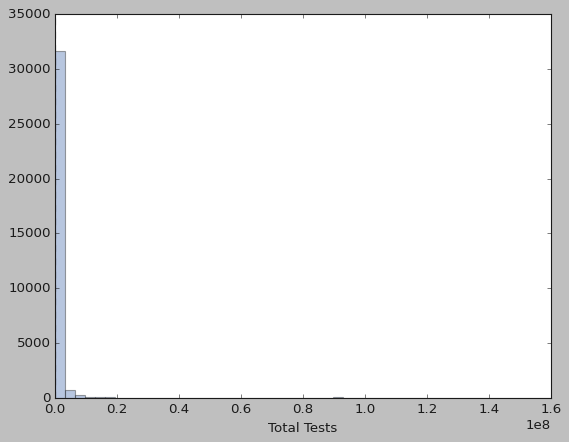

In [ ]:
sns.distplot(df['Total Tests'], kde=False);
plt.axvline(0, color="k", linestyle="--");

In [ ]:
from pandas.api.types import is_string_dtype
for col in df.columns:
  if is_string_dtype(df[col].dtype):
    df[col] = df[col].str.strip()

In [ ]:
#df.drop(subset=['Date'], inplace=True)
df.drop('Date', inplace=True, axis=1)
df.drop('Country', inplace=True, axis=1)


In [ ]:
from sklearn.model_selection import train_test_split

x = df.loc[:, df.columns != 'Total Cases']
y = df['Total Cases']

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.1, random_state=1)

In [ ]:
print(train_x)
print(train_y)

       Population   Total Tests  Total Deaths  Total Recovered  \
23260    37837112  2.374686e+06   1756.000000          35321.0   
15432      542646  4.933800e+04      8.000000           1927.0   
27383     6642166  1.292014e+06    133.000000           2913.0   
10044   102759475  1.350000e+05   1126.000000           7756.0   
6923      5460246  1.488450e+05     28.000000           1231.0   
...           ...           ...           ...              ...   
7813      1978139  1.500000e+03      6.000000             42.0   
32511      400140  3.850500e+04     26.000000            837.0   
5192      6936318  5.871300e+04     95.000000            476.0   
12172    18826888  1.135407e+06     77.000000           9188.0   
33003       72027  2.077000e+03   3013.837104             18.0   

       Serious or Critical  Active Cases  
23260            72.000000       11712.0  
15432             9.000000         402.0  
27383           449.143356        1265.0  
10044            41.000000       20

In [ ]:
data = pd.get_dummies(df, drop_first=True)

In [ ]:
data

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,331441624,3.722145e+06,738792.0,39014.000000,68269.0,13551.000000,631509.0
1,1383048851,3.351230e+05,16365.0,521.000000,2463.0,449.143356,13381.0
2,212900304,6.298500e+04,36722.0,2361.000000,14026.0,6634.000000,20335.0
3,145948762,1.831892e+06,36793.0,313.000000,3057.0,8.000000,33423.0
4,33074060,1.358950e+05,14420.0,348.000000,6684.0,117.000000,7388.0
...,...,...,...,...,...,...,...
33223,3502,2.261000e+03,13.0,3013.837104,13.0,449.143356,0.0
33224,801,1.292014e+06,12.0,3013.837104,12.0,449.143356,0.0
33225,5787,1.051000e+03,11.0,3013.837104,5.0,449.143356,6.0
33226,600533,1.292014e+06,10.0,1.000000,8.0,449.143356,1.0


In [ ]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
data

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,331441624,3.722145e+06,738792.0,39014.000000,68269.0,13551.000000,631509.0
1,1383048851,3.351230e+05,16365.0,521.000000,2463.0,449.143356,13381.0
2,212900304,6.298500e+04,36722.0,2361.000000,14026.0,6634.000000,20335.0
3,145948762,1.831892e+06,36793.0,313.000000,3057.0,8.000000,33423.0
4,33074060,1.358950e+05,14420.0,348.000000,6684.0,117.000000,7388.0
...,...,...,...,...,...,...,...
33223,3502,2.261000e+03,13.0,3013.837104,13.0,449.143356,0.0
33224,801,1.292014e+06,12.0,3013.837104,12.0,449.143356,0.0
33225,5787,1.051000e+03,11.0,3013.837104,5.0,449.143356,6.0
33226,600533,1.292014e+06,10.0,1.000000,8.0,449.143356,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_x = sc.fit_transform(train_x)
test_x = sc.fit_transform(test_x)

In [ ]:
from sklearn.svm import SVC

svm = SVC(random_state=1, verbose=1)
svm.fit(train_x, train_y)
predict_y = svm.predict(test_x)

#acc = accuracy_score(test_y, q_si_predict)
#print(acc)

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(train_x, train_y)

ValueError: ignored

total_test = df['Total Tests'].tolist()
country = df['Country'].tolist()

total_cases = df['Total Cases'].tolist()
population = df['Population'].tolist()

total_deaths = df['Total Deaths'].tolist()
total_recovered = df['Total Recovered'].tolist()

serious_or_critical = df['Serious or Critical'].tolist()
active_cases = df['Active Cases'].tolist()
date = df['Date'].tolist()

